In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pylab

In [2]:
# set directory
os.chdir('/Greywater_Metagemonics/Greywater_Data/')

In [3]:
sample_id = ["house_1_raw", "house_1_treat",
             "house_2_raw", "house_2_treat",
             "house_3_raw", "house_3_treat",
             "house_4_raw", "house_4_treat",
             "house_5_raw", "house_5_treat"]

In [4]:
arg = "ARGs/RGI/ARO_rpkm_summary_strict.csv"
arg_df = pd.read_csv(arg,index_col = 0)
arg_df.head()

,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
ARO Term,,,,,,,,,,
23S rRNA (adenine(2058)-N(6))-methyltransferase Erm(A),0.000000,0.0,0.812102,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
AAC(3)-IVb,2.770449,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
AAC(3)-Ib,0.000000,0.0,0.058625,0.0,9.326216,0.000000,44.560471,18.194486,0.0,0.0
AAC(6')-Ip,0.000000,0.0,0.096660,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ACI-1,0.000000,0.0,0.000000,0.0,0.000000,0.823378,0.000000,0.000000,0.0,0.0


In [5]:
arg_df.shape

(93, 10)

In [6]:
diversity = pd.DataFrame()
diversity['Richness'] = arg_df.astype(bool).sum(axis=0)
diversity['House'] = ['House 1', 'House 1', 'House 2', 'House 2', 'House 3', 'House 3', 
                     'House 4', 'House 4', 'House 5', 'House 5']
diversity['Treatment'] = ['Raw', 'Treated', 'Raw', 'Treated','Raw', 'Treated',
                         'Raw', 'Treated','Raw', 'Treated']
diversity

,Richness,House,Treatment
house_1_raw,27,House 1,Raw
house_1_treat,7,House 1,Treated
house_2_raw,22,House 2,Raw
house_2_treat,9,House 2,Treated
house_3_raw,13,House 3,Raw
house_3_treat,7,House 3,Treated
house_4_raw,15,House 4,Raw
house_4_treat,13,House 4,Treated
house_5_raw,26,House 5,Raw
house_5_treat,9,House 5,Treated


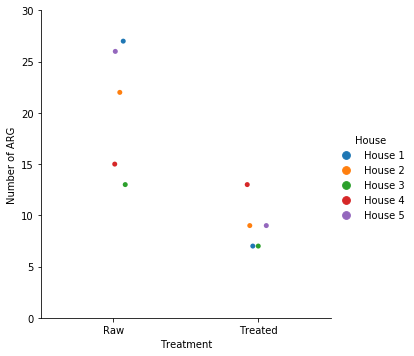

In [12]:
sns.catplot(x="Treatment", y="Richness", data=diversity, hue='House', jitter=True)
plt.ylim([0,30])
plt.ylabel("Number of ARG")
plt.savefig('ARGs/figures/ARG_richness_strict.pdf',bbox_inches='tight')

In [13]:
arg_df['sum'] = arg_df.sum(axis = 1)
top_20 = arg_df.sort_values(by=['sum'], ascending = False).head(20).drop(columns=['sum'])

others = list(arg_df.drop(columns=['sum']).sum(axis=0)-top_20.sum(axis=0))
arg_df = arg_df.drop(columns=['sum'])
print(others)
top_20.loc["Others",:] = others
top_20

[10.48615660382832, 1.147024047847399, 3.3673672371835295, 4.57167091832968, 3.0494810806717396, 3.8945482788049537, 2.1789881707426275, 1.1144250911549705, 4.235769677392, 1.326727696958816]


,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
ARO Term,,,,,,,,,,
adeF,0.415046,4.555836,4.620820,35.091427,8.161073,0.000000,16.938073,0.000000,63.342417,11.572338
sul2,0.000000,0.134400,5.081937,0.000000,0.362474,0.000000,55.478680,12.962462,8.074722,5.706150
tet(A),3.955885,0.000000,3.903182,1.551146,4.737003,0.351994,47.487229,16.321598,0.000000,0.000000
APH(6)-Id,4.336943,0.000000,0.000000,0.000000,9.156182,0.000000,45.918639,15.987107,0.000000,0.000000
AAC(3)-Ib,0.000000,0.000000,0.058625,0.000000,9.326216,0.000000,44.560471,18.194486,0.000000,0.000000
OXA-5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.999122,5.364378,0.000000,0.000000
qacEdelta1,0.000000,0.000000,0.000000,0.000000,22.670943,0.000000,0.000000,0.189215,0.000000,0.000000
AER-1,6.040486,0.000000,3.898089,0.796147,0.000000,0.000000,8.257714,1.043472,0.250697,0.000000
cmlA6,0.000000,0.000000,0.000000,0.000000,8.022668,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
rename = {}
for name in list(top_20.columns):
    new_name = name.strip("RPKM_")
    rename[name] = new_name
top_20 = top_20.rename(columns=rename)

### Top 10 ARG alleles + "Others" dataframe

In [24]:
arg_df['sum'] = arg_df.sum(axis = 1)
top_10 = arg_df.sort_values(by=['sum'], ascending = False).head(10).drop(columns=['sum'])

others = list(arg_df.drop(columns=['sum']).sum(axis=0)-top_10.sum(axis=0))
arg_df = arg_df.drop(columns=['sum'])
print(others)
top_10.loc["Others",:] = others
top_10

[26.26503581536523, 6.084581115609067, 9.0743673601904, 4.57167091832968, 3.0494810806717396, 3.8945482788049537, 8.240578787580205, 1.1144250911549705, 14.328462029570346, 1.326727696958816]


,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
ARO Term,,,,,,,,,,
adeF,0.415046,4.555836,4.620820,35.091427,8.161073,0.000000,16.938073,0.000000,63.342417,11.572338
sul2,0.000000,0.134400,5.081937,0.000000,0.362474,0.000000,55.478680,12.962462,8.074722,5.706150
tet(A),3.955885,0.000000,3.903182,1.551146,4.737003,0.351994,47.487229,16.321598,0.000000,0.000000
APH(6)-Id,4.336943,0.000000,0.000000,0.000000,9.156182,0.000000,45.918639,15.987107,0.000000,0.000000
AAC(3)-Ib,0.000000,0.000000,0.058625,0.000000,9.326216,0.000000,44.560471,18.194486,0.000000,0.000000
OXA-5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.999122,5.364378,0.000000,0.000000
qacEdelta1,0.000000,0.000000,0.000000,0.000000,22.670943,0.000000,0.000000,0.189215,0.000000,0.000000
AER-1,6.040486,0.000000,3.898089,0.796147,0.000000,0.000000,8.257714,1.043472,0.250697,0.000000
cmlA6,0.000000,0.000000,0.000000,0.000000,8.022668,0.000000,0.000000,0.000000,0.000000,0.000000


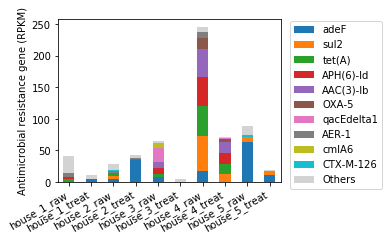

In [356]:
# define n different colors
NUM_COLORS = 10
cm = pylab.get_cmap('tab20')
colors = []
for i in range(NUM_COLORS):
    colors.append(cm(1.*i/NUM_COLORS))
colors.append("lightgrey")
plt.rcParams['figure.figsize'] = [4, 3]
# make stacked bar plot
ax = top_10.transpose().plot.bar(stacked = True, color = colors)
plt.xticks(rotation=30, horizontalalignment="right")
# reverse legend labels, set legend outside the plot.
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.02, 0.75))
ax.legend(bbox_to_anchor=(1.02, 1.02))

plt.ylabel("Antimicrobial resistance gene (RPKM)")
# save the plot
plt.savefig('ARGs/figures/RGI_bwt_top_10_ARO_RPKM_strict.pdf',bbox_inches='tight')

## Plots for abstract art: raw vs treated greywater ARG cumulative RPKM

In [324]:
arg_df_sum = arg_df.sum(axis = 0).to_frame().rename(columns={0:"ARG abundance"})

In [330]:
arg_df_sum = arg_df_sum.reindex(['house_5_treat', 'house_4_treat', 'house_3_treat', 'house_2_treat', 'house_1_treat',
                                 'house_5_raw', 'house_4_raw', 'house_3_raw', 'house_2_raw', 'house_1_raw'])

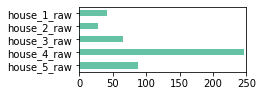

In [380]:
NUM_COLORS = 5
cm = pylab.get_cmap('Set2')
colors = []
for i in range(NUM_COLORS):
    colors.append(cm(1.*i/NUM_COLORS))
plt.rcParams['figure.figsize'] = [3, 1.2]
#fig, (ax1, ax2) = plt.subplots(2)
# make bar plot
ax1 = arg_df_sum.tail(5).plot.barh(color = colors[0])
ax1.legend().set_visible(False)
plt.xlim([0,250])
plt.savefig('ARGs/figures/RGI_bwt_ARO_RPKM_strict_raw.pdf',bbox_inches='tight')

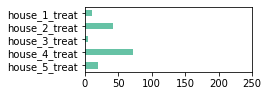

In [381]:
ax2 = arg_df_sum['ARG abundance'].head(5).plot.barh(color = colors[0])
ax2.legend().set_visible(False)
plt.xlim([0,250])
#plt.ylabel("Antimicrobial resistance gene (RPKM)")
# save the plot
plt.savefig('ARGs/figures/RGI_bwt_ARO_RPKM_strict_treat.pdf',bbox_inches='tight')

## Read in allele rpkm data for Gene Family and Resistance Mechanism summary

In [7]:
### 
arg_rpkm = 'ARGs/RGI/allele_rpkm_summary_strict.csv'
arg_summary = pd.read_csv(arg_rpkm, index_col = 0)
arg_summary.head()

,AMR Gene Family,ARO Accession,ARO Term,Drug Class,Reference Allele Source,Resistance Mechanism,Resistomes & Variants: Observed Pathogen(s),Resistomes & Variants: Observed in Genome(s),Resistomes & Variants: Observed in Plasmid(s),house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
ARO:3001400|ID:909|Name:OXA-5|NCBI:X58272,OXA beta-lactamase,3001400,OXA-5,carbapenem; cephalosporin; penam,CARD curation,antibiotic inactivation,Pseudomonas aeruginosa,no data,no data,0.000000,0.0,0.000000,0.000000,0.0,0.0,17.999122,5.364378,0.000000,0.0
ARO:3002481|ID:1149|Name:AER-1|NCBI:U14748,AER beta-lactamase,3002481,AER-1,penam,CARD curation,antibiotic inactivation,Aeromonas hydrophila,no data,no data,6.040486,0.0,3.898089,0.796147,0.0,0.0,8.257714,1.043472,0.250697,0.0
ARO:3003986|ID:2522|Name:TaeA|NCBI:KX531049.1,ATP-binding cassette (ABC) antibiotic efflux pump,3003986,TaeA,pleuromutilin antibiotic,CARD curation,antibiotic efflux,Paenibacillus sp.,no data,no data,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.727121,0.000000,0.0
Prevalence_Sequence_ID:7968|ID:337|Name:adeC|ARO:3003811,resistance-nodulation-cell division (RND) anti...,3003811,adeC,glycylcycline; tetracycline antibiotic,In silico Strict 95.48% identity,antibiotic efflux,Acinetobacter baumannii,NO,NO,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.070651,0.000000,0.0
Prevalence_Sequence_ID:9459|ID:1226|Name:adeG|ARO:3000778,resistance-nodulation-cell division (RND) anti...,3000778,adeG,fluoroquinolone antibiotic; tetracycline antib...,In silico Strict 95.07% identity,antibiotic efflux,Acinetobacter baumannii,NO,NO,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.026964,0.000000,0.0


In [22]:
colors = []
cm = pylab.get_cmap('Dark2')
NUM_COLORS = 8
for i in range(NUM_COLORS):
    colors.append(cm(1.*i/NUM_COLORS))

In [10]:
sample_id = list(arg_df.columns)

In [11]:
# replace rpkm numbers with count 1
for sample in sample_id:
    arg_summary[sample][arg_summary[sample] != 0] = 1

/Users/shuaishuai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
arg_summary.head()

,AMR Gene Family,ARO Accession,ARO Term,Drug Class,Reference Allele Source,Resistance Mechanism,Resistomes & Variants: Observed Pathogen(s),Resistomes & Variants: Observed in Genome(s),Resistomes & Variants: Observed in Plasmid(s),house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
ARO:3001400|ID:909|Name:OXA-5|NCBI:X58272,OXA beta-lactamase,3001400,OXA-5,carbapenem; cephalosporin; penam,CARD curation,antibiotic inactivation,Pseudomonas aeruginosa,no data,no data,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
ARO:3002481|ID:1149|Name:AER-1|NCBI:U14748,AER beta-lactamase,3002481,AER-1,penam,CARD curation,antibiotic inactivation,Aeromonas hydrophila,no data,no data,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
ARO:3003986|ID:2522|Name:TaeA|NCBI:KX531049.1,ATP-binding cassette (ABC) antibiotic efflux pump,3003986,TaeA,pleuromutilin antibiotic,CARD curation,antibiotic efflux,Paenibacillus sp.,no data,no data,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Prevalence_Sequence_ID:7968|ID:337|Name:adeC|ARO:3003811,resistance-nodulation-cell division (RND) anti...,3003811,adeC,glycylcycline; tetracycline antibiotic,In silico Strict 95.48% identity,antibiotic efflux,Acinetobacter baumannii,NO,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Prevalence_Sequence_ID:9459|ID:1226|Name:adeG|ARO:3000778,resistance-nodulation-cell division (RND) anti...,3000778,adeG,fluoroquinolone antibiotic; tetracycline antib...,In silico Strict 95.07% identity,antibiotic efflux,Acinetobacter baumannii,NO,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
GF_summary = arg_summary.groupby(by = 'AMR Gene Family').sum()
GF_summary=GF_summary.drop(columns=['ARO Accession'])
print(GF_summary.shape)
GF_summary.head()

(43, 10)


,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
AMR Gene Family,,,,,,,,,,
AAC(3),1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
AAC(6'),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABC-F ATP-binding cassette ribosomal protection protein,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
ACI beta-lactamase,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ACT beta-lactamase,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
GF_summary['sum'] = GF_summary.sum(axis=1)
GF_summary[GF_summary['sum']>=10]

,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat,sum
AMR Gene Family,,,,,,,,,,,
major facilitator superfamily (MFS) antibiotic efflux pump,7.0,1.0,6.0,1.0,4.0,1.0,2.0,4.0,4.0,1.0,31.0
resistance-nodulation-cell division (RND) antibiotic efflux pump,8.0,2.0,7.0,4.0,3.0,1.0,4.0,4.0,12.0,2.0,47.0
sulfonamide resistant sul,0.0,1.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,11.0


In [68]:
GF_summary.sort_values(by="sum",ascending = False).to_csv('ARGs/RGI/GeneFamily_counts_summary_strict.csv')

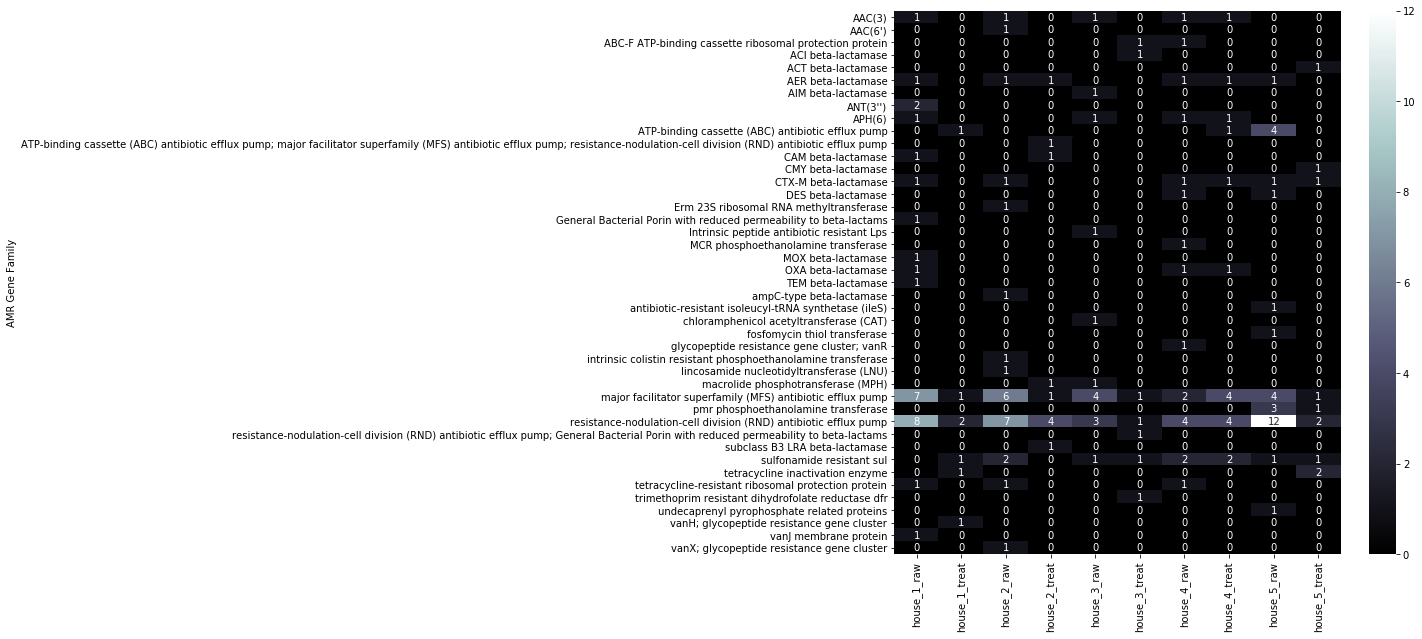

In [49]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(GF_summary,annot=True, cmap = "RdBu")

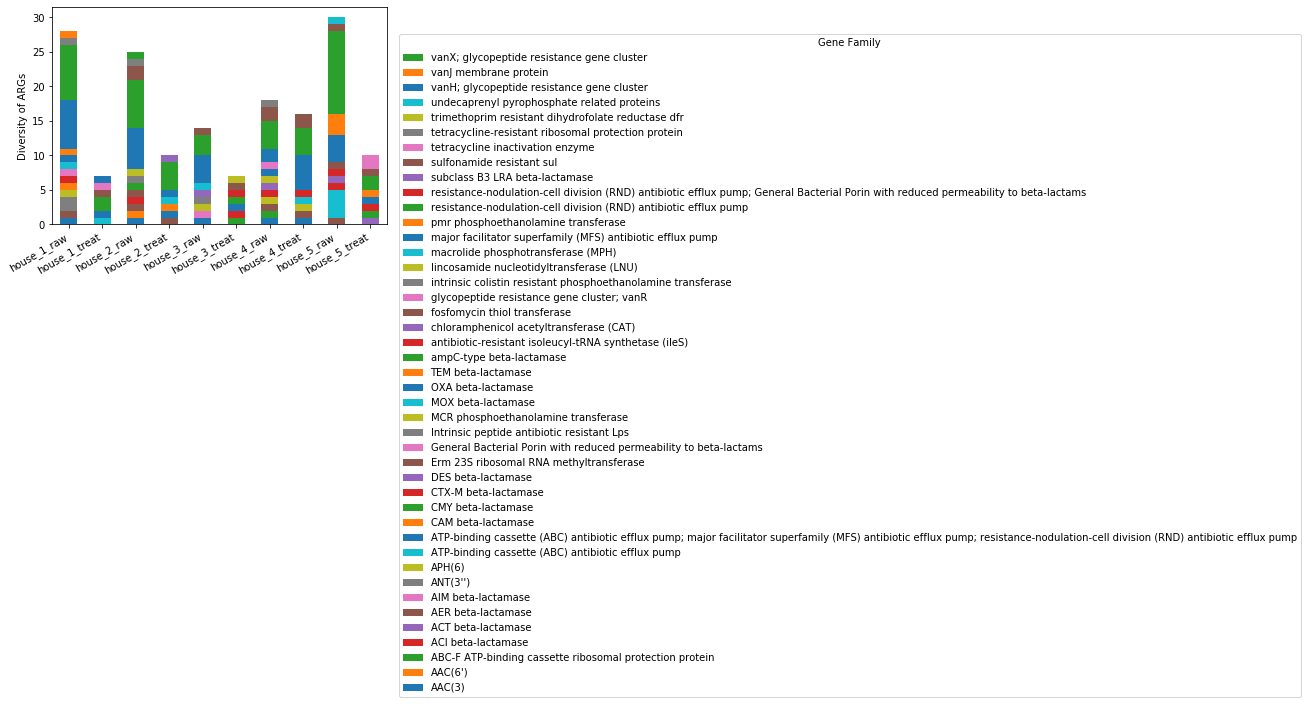

In [383]:
plt.rcParams['figure.figsize'] = [6, 4]
ax = GF_summary.drop(columns=['sum']).transpose().plot.bar(stacked = True)
plt.xticks(rotation=30, horizontalalignment="right")
# reverse legend labels, set legend outside the plot.
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.02, 0.9), 
          title = "Gene Family")
plt.ylabel("Diversity of ARGs")
# save the plot
plt.savefig('ARGs/figures/RGI_bwt_ARG_numbers_by_GF_strict.pdf',bbox_inches='tight')

(8, 10)


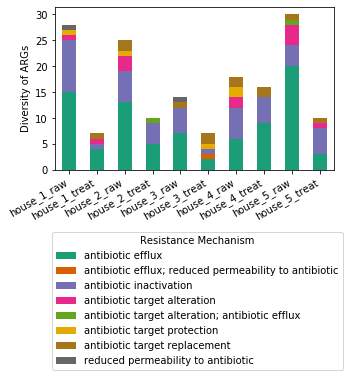

In [39]:
RM_summary = arg_summary.groupby(by = 'Resistance Mechanism').sum()
RM_summary=RM_summary.drop(columns=['ARO Accession'])
print(RM_summary.shape)
#RM_summary.head()

plt.rcParams['figure.figsize'] = [5, 3]
ax = RM_summary.transpose().plot.bar(stacked = True, color=colors)
plt.xticks(rotation=30, horizontalalignment="right")
# reverse legend labels, set legend outside the plot.
handles, labels = ax.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.02, 0.9), 
ax.legend(bbox_to_anchor=(1.05, -0.35), 
          title = "Resistance Mechanism")
plt.ylabel("Diversity of ARGs")
# save the plot
plt.savefig('ARGs/figures/RGI_bwt_ARG_numbers_by_RM_strict_new_colors.pdf',bbox_inches='tight')

****
# Shared number of ARGs and Gene Families

In [70]:
GF_count = "ARGs/RGI/GeneFamily_counts_summary_strict.csv"
GF_count_df = pd.read_csv(GF_count, index_col = 0)
GF_count_df.head(2)

,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat,sum
AMR Gene Family,,,,,,,,,,,
resistance-nodulation-cell division (RND) antibiotic efflux pump,8.0,2.0,7.0,4.0,3.0,1.0,4.0,4.0,12.0,2.0,47.0
major facilitator superfamily (MFS) antibiotic efflux pump,7.0,1.0,6.0,1.0,4.0,1.0,2.0,4.0,4.0,1.0,31.0


In [80]:
raw = [0,2,4,6,8]
treat = [1,3,5,7,9]
GF_raw = GF_count_df[[sample_id[i] for i in raw]]
GF_treat = GF_count_df[[sample_id[i] for i in treat]]

In [103]:
GF_raw[GF_raw.astype(bool).sum(axis=1)==5]

,house_1_raw,house_2_raw,house_3_raw,house_4_raw,house_5_raw
AMR Gene Family,,,,,
resistance-nodulation-cell division (RND) antibiotic efflux pump,8.0,7.0,3.0,4.0,12.0
major facilitator superfamily (MFS) antibiotic efflux pump,7.0,6.0,4.0,2.0,4.0


In [104]:
GF_treat[GF_treat.astype(bool).sum(axis=1)==5]

,house_1_treat,house_2_treat,house_3_treat,house_4_treat,house_5_treat
AMR Gene Family,,,,,
resistance-nodulation-cell division (RND) antibiotic efflux pump,2.0,4.0,1.0,4.0,2.0
major facilitator superfamily (MFS) antibiotic efflux pump,1.0,1.0,1.0,4.0,1.0


#### resistance-nodulation-cell division (RND) antibiotic efflux pump and 
#### major facilitator superfamily (MFS) antibiotic efflux pump are shared by all 10 samples

## ARG (ARO Terms) rpkm

In [207]:
ARG = "ARGs/RGI/ARO_rpkm_summary_strict.csv"
ARG_df = pd.read_csv(ARG, index_col = 0)
ARG_df.head(2)

,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
ARO Term,,,,,,,,,,
23S rRNA (adenine(2058)-N(6))-methyltransferase Erm(A),0.000000,0.0,0.812102,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAC(3)-IVb,2.770449,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
# non zero column = 8
print(ARG_df.shape)
ARG_df[ARG_df.astype(bool).sum(axis=1)==1]


(93, 10)


,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
ARO Term,,,,,,,,,,
23S rRNA (adenine(2058)-N(6))-methyltransferase Erm(A),0.000000,0.000000,0.812102,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000
AAC(3)-IVb,2.770449,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000
AAC(6')-Ip,0.000000,0.000000,0.096660,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000
ACI-1,0.000000,0.000000,0.000000,0.0,0.0,0.823378,0.00000,0.0,0.000000,0.000000
ACT-29,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.042262
...,...,...,...,...,...,...,...,...,...,...
vanHF,0.000000,0.128714,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000
vanJ,4.218447,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000
vanRI,0.000000,0.000000,0.000000,0.0,0.0,0.000000,3.41994,0.0,0.000000,0.000000


#### There is no ARGs shared by all 10 samples. 

#### Raw greywater

In [208]:
ARG_raw = ARG_df[[sample_id[i] for i in raw]]
ARG_treat = ARG_df[[sample_id[i] for i in treat]]

In [101]:
ARG_raw[ARG_raw.astype(bool).sum(axis=1)==5]

,house_1_raw,house_2_raw,house_3_raw,house_4_raw,house_5_raw
ARO Term,,,,,
adeF,0.415046,4.62082,8.161073,16.938073,63.342417


In [200]:
ARG_raw_unique = ARG_raw.drop(index = ARG_raw[ARG_raw.astype(bool).sum(axis=1)==0].index)
print(ARG_raw_unique.shape)
raw_list = list(ARG_raw_unique.index)
with open('ARGs/RGI/ARG_list_raw_strict.txt', 'w') as f:
    for ARG in raw_list:
        f.write(ARG+'\n')

(71, 5)


In [140]:
# Unique ARGs:
54/71*100

76.05633802816901

#### Treated greywater

In [102]:
ARG_treat[ARG_treat.astype(bool).sum(axis=1)==5]

,house_1_treat,house_2_treat,house_3_treat,house_4_treat,house_5_treat
ARO Term,,,,,


In [201]:
ARG_treat_unique = ARG_treat.drop(index = ARG_treat[ARG_treat.astype(bool).sum(axis=1)==0].index)
print(ARG_treat_unique.shape)
treat_list = list(ARG_treat_unique.index)
with open('ARGs/RGI/ARG_list_treat_strict.txt', 'w') as f:
    for ARG in treat_list:
        f.write(ARG+'\n')

(37, 5)


In [142]:
# Unique ARGs:
32/37*100

86.48648648648648

#### Only adeF gene was shared by all raw greywater samples

In [188]:
ARG_r_t = pd.concat([ARG_raw.sum(axis=1).to_frame().rename(columns={0: "raw"}),ARG_treat.sum(axis=1).to_frame().rename(columns={0: "treated"})], axis=1)

In [192]:
(ARG_r_t['raw'].sum()-ARG_r_t['treated'].sum())/ARG_r_t['raw'].sum()*100

68.46767403207666

In [191]:
ARG_r_t

,raw,treated,reduction
ARO Term,,,
23S rRNA (adenine(2058)-N(6))-methyltransferase Erm(A),0.812102,0.000000,1.000000
AAC(3)-IVb,2.770449,0.000000,1.000000
AAC(3)-Ib,53.945312,18.194486,0.662723
AAC(6')-Ip,0.096660,0.000000,1.000000
ACI-1,0.000000,0.823378,-inf
...,...,...,...
vanHF,0.000000,0.128714,-inf
vanJ,4.218447,0.000000,1.000000
vanRI,3.419940,0.000000,1.000000


## Sort ARG abundance by raw vs. treated

In [211]:
ARG_raw['sum'] = ARG_raw.sum(axis=1)
ARG_raw = ARG_raw.sort_values(by = 'sum', ascending = False).drop(columns=['sum'])
ARG_raw.head(10)

,house_1_raw,house_2_raw,house_3_raw,house_4_raw,house_5_raw
ARO Term,,,,,
adeF,0.415046,4.620820,8.161073,16.938073,63.342417
sul2,0.000000,5.081937,0.362474,55.478680,8.074722
tet(A),3.955885,3.903182,4.737003,47.487229,0.000000
APH(6)-Id,4.336943,0.000000,9.156182,45.918639,0.000000
AAC(3)-Ib,0.000000,0.058625,9.326216,44.560471,0.000000
qacEdelta1,0.000000,0.000000,22.670943,0.000000,0.000000
AER-1,6.040486,3.898089,0.000000,8.257714,0.250697
OXA-5,0.000000,0.000000,0.000000,17.999122,0.000000
cmlA6,0.000000,0.000000,8.022668,0.000000,0.000000


In [212]:
ARG_treat['sum'] = ARG_treat.sum(axis=1)
ARG_treat = ARG_treat.sort_values(by = 'sum', ascending = False).drop(columns=['sum'])
ARG_treat.head(10)

/Users/shuaishuai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,house_1_treat,house_2_treat,house_3_treat,house_4_treat,house_5_treat
ARO Term,,,,,
adeF,4.555836,35.091427,0.000000,0.000000,11.572338
sul2,0.134400,0.000000,0.000000,12.962462,5.706150
tet(A),0.000000,1.551146,0.351994,16.321598,0.000000
AAC(3)-Ib,0.000000,0.000000,0.000000,18.194486,0.000000
APH(6)-Id,0.000000,0.000000,0.000000,15.987107,0.000000
OXA-5,0.000000,0.000000,0.000000,5.364378,0.000000
Acinetobacter baumannii AbaQ,4.937557,0.000000,0.000000,0.000000,0.000000
adeK,0.000000,2.639401,0.000000,0.000000,0.000000
sul4,0.000000,0.000000,2.444403,0.000000,0.000000


### Get rpkm for Gene Family

In [197]:
rpkm = "ARGs/RGI/allele_rpkm_summary_strict.csv"
rpkm_df = pd.read_csv(rpkm, index_col=0)
GF_rpkm = rpkm_df.groupby(by="AMR Gene Family").sum().drop(columns = ['ARO Accession'])
GF_rpkm.to_csv('ARGs/RGI/GeneFamily_rpkm_summary_strict.csv')

In [199]:
GF_rpkm_new.drop(columns=['sum']).to_csv('ARGs/RGI/GeneFamily_rpkm_summary_strict.csv')

In [196]:
GF_raw = GF_rpkm[[sample_id[i] for i in raw]]
GF_treat = GF_rpkm[[sample_id[i] for i in treat]]
GF_r_t = pd.concat([GF_raw.sum(axis=1).to_frame().rename(columns={0: "raw"}),GF_treat.sum(axis=1).to_frame().rename(columns={0: "treated"})], axis=1)
GF_r_t['Reduction (%)'] = (GF_r_t['raw']-GF_r_t['treated'])/GF_r_t['raw']*100
GF_r_t.sort_values(by='Reduction (%)', ascending = False)

,raw,treated,Reduction (%)
AMR Gene Family,,,
Erm 23S ribosomal RNA methyltransferase,0.812102,0.000000,100.000000
antibiotic-resistant isoleucyl-tRNA synthetase (ileS),1.161662,0.000000,100.000000
lincosamide nucleotidyltransferase (LNU),0.036159,0.000000,100.000000
undecaprenyl pyrophosphate related proteins,0.046510,0.000000,100.000000
AAC(6'),0.096660,0.000000,100.000000
vanX; glycopeptide resistance gene cluster,0.097612,0.000000,100.000000
Intrinsic peptide antibiotic resistant Lps,0.098202,0.000000,100.000000
chloramphenicol acetyltransferase (CAT),0.130581,0.000000,100.000000
fosfomycin thiol transferase,0.210062,0.000000,100.000000


#### Generate list of ARO terms for each sample

In [132]:
for sample in sample_id:
    ARG_list = list(ARG_df[ARG_df[f'{sample}'] != 0.0].index)
    with open(f'ARGs/RGI/{sample}_ARG_list_strict.txt', 'w') as f:
        for ARG in ARG_list:
            f.write(ARG+'\n')

### Heatmap

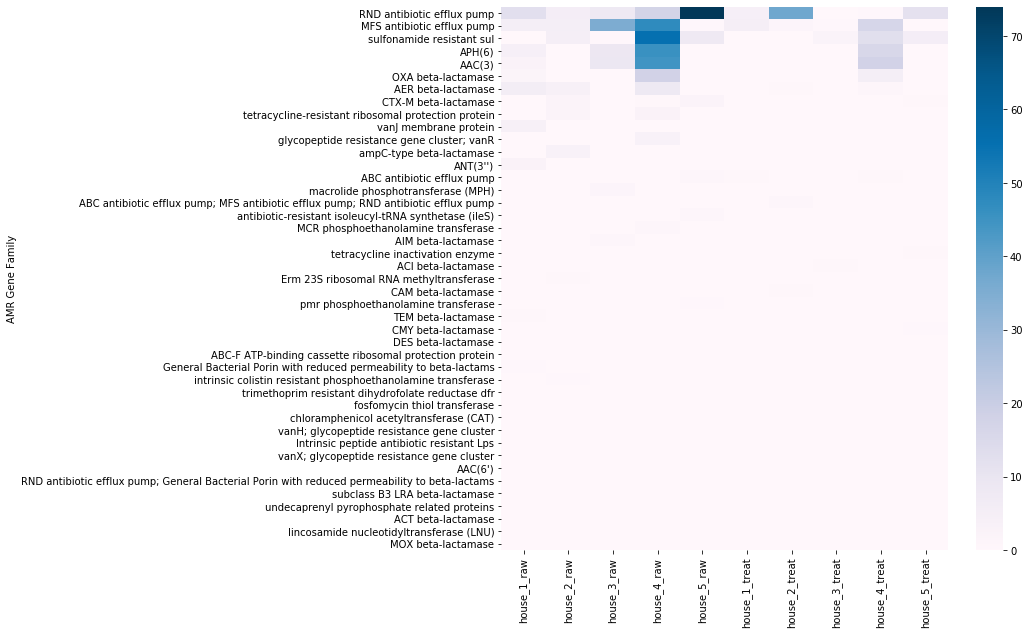

In [174]:
GF_rpkm['sum'] = GF_rpkm.sum(axis=1)
GF_rpkm = GF_rpkm.sort_values(by='sum', ascending = False)
GF_rpkm_new = GF_rpkm.rename(index={'resistance-nodulation-cell division (RND) antibiotic efflux pump': 'RND antibiotic efflux pump', 
                                    'major facilitator superfamily (MFS) antibiotic efflux pump': 'MFS antibiotic efflux pump',
                                   'ATP-binding cassette (ABC) antibiotic efflux pump':'ABC antibiotic efflux pump',
                                   'ATP-binding cassette (ABC) antibiotic efflux pump; major facilitator superfamily (MFS) antibiotic efflux pump; resistance-nodulation-cell division (RND) antibiotic efflux pump':'ABC antibiotic efflux pump; MFS antibiotic efflux pump; RND antibiotic efflux pump',
                                   'resistance-nodulation-cell division (RND) antibiotic efflux pump; General Bacterial Porin with reduced permeability to beta-lactams':'RND antibiotic efflux pump; General Bacterial Porin with reduced permeability to beta-lactams'})
plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(GF_rpkm_new[[sample_id[i] for i in raw+treat]], cmap = "PuBu")
plt.savefig('ARGs/figures/Heatmap_GeneFamily_rpkm_strict.pdf', bbox_inches='tight')

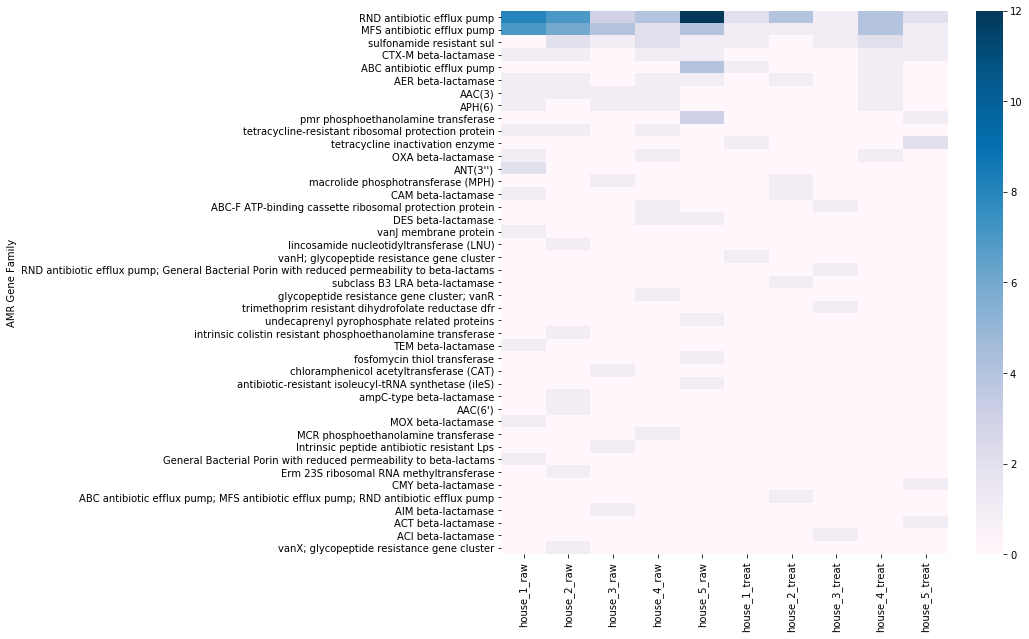

In [176]:
GF_count_new = GF_count_df.rename(index={'resistance-nodulation-cell division (RND) antibiotic efflux pump': 'RND antibiotic efflux pump', 
                                    'major facilitator superfamily (MFS) antibiotic efflux pump': 'MFS antibiotic efflux pump',
                                   'ATP-binding cassette (ABC) antibiotic efflux pump':'ABC antibiotic efflux pump',
                                   'ATP-binding cassette (ABC) antibiotic efflux pump; major facilitator superfamily (MFS) antibiotic efflux pump; resistance-nodulation-cell division (RND) antibiotic efflux pump':'ABC antibiotic efflux pump; MFS antibiotic efflux pump; RND antibiotic efflux pump',
                                   'resistance-nodulation-cell division (RND) antibiotic efflux pump; General Bacterial Porin with reduced permeability to beta-lactams':'RND antibiotic efflux pump; General Bacterial Porin with reduced permeability to beta-lactams'})
plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(GF_count_new[[sample_id[i] for i in raw+treat]], cmap = "PuBu")
plt.savefig('ARGs/figures/Heatmap_GeneFamily_count_strict.pdf', bbox_inches='tight')

In [177]:
'''plt.rcParams['figure.figsize'] = [10, 10]
sns.clustermap(GF_count_new[[sample_id[i] for i in raw+treat]], metric="euclidean", standard_scale=1, method="ward", cmap="Blues")'''

'GF_count_new = GF_count_df.rename(index={\'resistance-nodulation-cell division (RND) antibiotic efflux pump\': \'RND antibiotic efflux pump\', \n                                    \'major facilitator superfamily (MFS) antibiotic efflux pump\': \'MFS antibiotic efflux pump\',\n                                   \'ATP-binding cassette (ABC) antibiotic efflux pump\':\'ABC antibiotic efflux pump\',\n                                   \'ATP-binding cassette (ABC) antibiotic efflux pump; major facilitator superfamily (MFS) antibiotic efflux pump; resistance-nodulation-cell division (RND) antibiotic efflux pump\':\'ABC antibiotic efflux pump; MFS antibiotic efflux pump; RND antibiotic efflux pump\',\n                                   \'resistance-nodulation-cell division (RND) antibiotic efflux pump; General Bacterial Porin with reduced permeability to beta-lactams\':\'RND antibiotic efflux pump; General Bacterial Porin with reduced permeability to beta-lactams\'})\n\nplt.rcParams[\'figure

---
## Analyze prevalence data

In [240]:
allele_df = pd.read_csv('ARGs/RGI/allele_rpkm_summary_strict.csv')
ARO_rpkm = allele_df.groupby('ARO Term').sum().drop(columns=['ARO Accession'])
ARO_prevalence = pd.read_csv('ARGs/card_prevalence.txt', delimiter = '\t')
ARO_info = ARO_prevalence.groupby(by ='Name').agg(lambda x: ';'.join(set(x)))
ARO_prevalence = ARO_prevalence.groupby(by ='Name').sum().drop(columns=['Model ID'])
ARO_info = pd.concat([ARO_info, ARO_prevalence], axis = 1)

In [241]:
ARO_info

,ARO Accession,Model Type,Pathogen,Criteria,ARO Categories,NCBI Plasmid,NCBI WGS,NCBI Chromosome,NCBI Genomic Island
Name,,,,,,,,,
23S rRNA (adenine(2058)-N(6))-methyltransferase Erm(A),ARO:3005099,protein homolog model,Streptococcus agalactiae;Streptococcus pyogene...,perfect;perfect_strict,antibiotic target alteration; lincosamide anti...,0.00,129.19,20.94,0.0
AAC(2')-IIa,ARO:3004628,protein homolog model,Klebsiella pneumoniae;Pseudomonas aeruginosa;S...,perfect;perfect_strict,aminoglycoside antibiotic; antibiotic inactiva...,0.00,0.18,3.21,0.0
AAC(2')-Ia,ARO:3002523,protein homolog model,Providencia stuartii,perfect;perfect_strict,aminoglycoside antibiotic; antibiotic inactiva...,0.00,163.33,181.82,0.0
AAC(2')-Ic,ARO:3002525,protein homolog model,Mycobacterium tuberculosis,perfect;perfect_strict,aminoglycoside antibiotic; antibiotic inactiva...,0.00,196.06,197.68,0.0
AAC(3)-IIIa,ARO:3002536,protein homolog model,Pseudomonas aeruginosa,perfect_strict,aminoglycoside antibiotic; antibiotic inactiva...,0.00,0.02,0.00,0.0
...,...,...,...,...,...,...,...,...,...
vmlR,ARO:3004476,protein homolog model,Bacillus subtilis,perfect;perfect_strict,antibiotic target protection; lincosamide anti...,0.00,78.90,113.72,0.0
y56 beta-lactamase,ARO:3003558,protein homolog model,Yersinia enterocolitica,perfect;perfect_strict,antibiotic inactivation; cephalosporin; penam,0.00,47.77,37.50,0.0
ykkC,ARO:3003063,protein homolog model,Bacillus subtilis;Bacillus halotolerans;Bacill...,perfect;perfect_strict,aminoglycoside antibiotic; antibiotic efflux; ...,0.00,311.51,358.29,0.0


In [242]:
ARO_df = pd.concat([ARO_rpkm, ARO_info], axis = 1)
ARO_df.shape

(2289, 19)

In [243]:
ARO_df.to_csv('ARGs/RGI/ARO_rpkm_info_strict.csv')

### Prevalence on plasmids not zero

In [244]:
ARO_df_edit = pd.read_csv('ARGs/RGI/ARO_rpkm_info_strict_edit.csv')
ARO_df_edit.head(5)

,Unnamed: 0,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat,ARO Accession,Model Type,Pathogen,Criteria,ARO Categories,NCBI Plasmid,NCBI WGS,NCBI Chromosome,NCBI Genomic Island
0,23S rRNA (adenine(2058)-N(6))-methyltransferas...,0.000000,0.0,0.812102,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,ARO:3005099,protein homolog model,Streptococcus agalactiae;Streptococcus pyogene...,perfect;perfect_strict,antibiotic target alteration; lincosamide anti...,0.00,129.19,20.94,0.00
1,AAC(3)-IVb,2.770449,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAC(3)-Ib,0.000000,0.0,0.058625,0.0,9.326216,0.000000,44.560471,18.194486,0.0,0.0,ARO:3002530,protein homolog model,Klebsiella pneumoniae;Enterobacter cloacae;Pse...,perfect;perfect_strict,aminoglycoside antibiotic; antibiotic inactiva...,2.52,3.23,0.06,1.45
3,AAC(6')-Ip,0.000000,0.0,0.096660,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,ARO:3002559,protein homolog model,Acinetobacter baumannii,perfect_strict,aminoglycoside antibiotic; antibiotic inactiva...,0.00,0.19,0.00,0.00
4,ACI-1,0.000000,0.0,0.000000,0.0,0.000000,0.823378,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
plasmid = ARO_df_edit[ARO_df_edit['NCBI Plasmid'] > 0.0]
plasmid = plasmid.rename(columns={"Unnamed: 0":'ARO Term'}).set_index('ARO Term')
print(plasmid.shape)
plasmid.head(5)

(41, 19)


,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat,ARO Accession,Model Type,Pathogen,Criteria,ARO Categories,NCBI Plasmid,NCBI WGS,NCBI Chromosome,NCBI Genomic Island
ARO Term,,,,,,,,,,,,,,,,,,,
AAC(3)-Ib,0.000000,0.0,0.058625,0.0,9.326216,0.000000,44.560471,18.194486,0.000000,0.0,ARO:3002530,protein homolog model,Klebsiella pneumoniae;Enterobacter cloacae;Pse...,perfect;perfect_strict,aminoglycoside antibiotic; antibiotic inactiva...,2.52,3.23,0.06,1.45
APH(6)-Id,4.336943,0.0,0.000000,0.0,9.156182,0.000000,45.918639,15.987107,0.000000,0.0,ARO:3002660,protein homolog model,Vibrio parahaemolyticus;Aeromonas caviae;Enter...,perfect_strict,aminoglycoside antibiotic; antibiotic inactiva...,426.26,1442.05,993.58,1885.45
CRP,0.000000,0.0,0.046956,0.0,0.000000,0.048484,0.000000,0.000000,0.060397,0.0,ARO:3000518,protein homolog model,Vibrio parahaemolyticus;Enterobacter kobei;Pro...,perfect;perfect_strict,antibiotic efflux; fluoroquinolone antibiotic;...,6.45,5007.24,4840.27,0.00
Escherichia coli mdfA,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.062014,0.0,ARO:3001328,protein homolog model,Proteus mirabilis;Shigella boydii;Listeria mon...,perfect_strict,antibiotic efflux; benzalkonium chloride; rhod...,1.31,1386.86,1431.74,0.00
ICR-Mo,0.000000,0.0,0.292444,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,ARO:3004569,protein homolog model,Klebsiella pneumoniae;Salmonella enterica;Esch...,perfect;perfect_strict,antibiotic target alteration; peptide antibiotic,1.04,125.02,111.11,0.00


In [249]:
raw_plasmid = plasmid.drop(columns = [sample_id[i] for i in treat])
treat_plasmid = plasmid.drop(columns = [sample_id[i] for i in raw])

In [259]:
ARG_plasmid = {}
raw_AROlist = []
treat_AROlist = []
for sample in sample_id:
    df = plasmid[plasmid[f'{sample}'] > 0]
    n = len(list(df.index))
    ARG_plasmid[f'{sample}'] = n
    if sample.endswith('raw'):
        raw_AROlist += list(df.index)
    else:
        treat_AROlist += list(df.index)

In [258]:
ARG_plasmid

{'house_1_raw': 16,
 'house_1_treat': 2,
 'house_2_raw': 12,
 'house_2_treat': 3,
 'house_3_raw': 10,
 'house_3_treat': 5,
 'house_4_raw': 8,
 'house_4_treat': 5,
 'house_5_raw': 14,
 'house_5_treat': 4}

In [261]:
len(set(raw_AROlist))

37

In [262]:
len(set(treat_AROlist))

13

---
## Drug Class by raw vs treated samples
### Get rpkm for drug class

In [309]:
rpkm = "ARGs/RGI/allele_rpkm_summary_strict.csv"
rpkm_df = pd.read_csv(rpkm, index_col=0)
rpkm_df.head(2)

,AMR Gene Family,ARO Accession,ARO Term,Drug Class,Reference Allele Source,Resistance Mechanism,Resistomes & Variants: Observed Pathogen(s),Resistomes & Variants: Observed in Genome(s),Resistomes & Variants: Observed in Plasmid(s),house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
ARO:3001400|ID:909|Name:OXA-5|NCBI:X58272,OXA beta-lactamase,3001400.0,OXA-5,carbapenem; cephalosporin; penam,CARD curation,antibiotic inactivation,Pseudomonas aeruginosa,no data,no data,0.000000,0.0,0.000000,0.000000,0.0,0.0,17.999122,5.364378,0.000000,0.0
ARO:3002481|ID:1149|Name:AER-1|NCBI:U14748,AER beta-lactamase,3002481.0,AER-1,penam,CARD curation,antibiotic inactivation,Aeromonas hydrophila,no data,no data,6.040486,0.0,3.898089,0.796147,0.0,0.0,8.257714,1.043472,0.250697,0.0


In [310]:
DrugClass_rpkm = rpkm_df.groupby(by = 'Drug Class').sum().drop(columns = ['ARO Accession'])
print(DrugClass_rpkm.shape)
DrugClass_rpkm.head(2)

(48, 10)


,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
Drug Class,,,,,,,,,,
acridine dye; disinfecting agents and intercalating dyes,0.0,0.0,0.000000,0.0,22.670943,0.0,0.0,0.189215,0.000000,0.0
aminocoumarin antibiotic,0.0,0.0,0.344015,0.0,0.083427,0.0,0.0,0.000000,0.055839,0.0


In [311]:
raw = [sample_id[i] for i in [0,2,4,6,8]]
treat = [sample_id[i] for i in [1,3,5,7,9]]
DrugClass_rpkm['Raw greywater'] = DrugClass_rpkm[raw].sum(axis = 1)
DrugClass_rpkm['Treated greywater'] = DrugClass_rpkm[treat].sum(axis = 1)
DrugClass_rpkm.head(2)

,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat,Raw greywater,Treated greywater
Drug Class,,,,,,,,,,,,
acridine dye; disinfecting agents and intercalating dyes,0.0,0.0,0.000000,0.0,22.670943,0.0,0.0,0.189215,0.000000,0.0,22.670943,0.189215
aminocoumarin antibiotic,0.0,0.0,0.344015,0.0,0.083427,0.0,0.0,0.000000,0.055839,0.0,0.483281,0.000000


In [272]:
DrugClass_rpkm[['Raw greywater', 'Treated greywater']].to_csv('ARGs/RGI/raw_treated_sum_rpkm_DrugClass_strict.csv')

In [312]:
DrugClass_rpkm.to_csv('ARGs/RGI/all_sample_rpkm_DrugClass_strict.csv')

In [386]:
## Read in edited file
DrugClass_rpkm = pd.read_csv('ARGs/RGI/raw_treated_sum_rpkm_DrugClass_strict_edit.csv')
DrugClass_rpkm = DrugClass_rpkm.groupby(by='Drug Class').sum()
print(DrugClass_rpkm.shape)
DrugClass_rpkm.head()

(30, 2)


,Raw greywater,Treated greywater
Drug Class,,
aminocoumarin antibiotic,12.292550,0.010583
aminoglycoside antibiotic,130.479862,34.248305
benzalkonium chloride,0.062014,0.000000
carbapenem,20.671330,8.793144
cephalosporin,37.236061,12.032369


In [387]:
DrugClass_rpkm = DrugClass_rpkm.sort_values(by = ['Raw greywater', 'Treated greywater'], ascending = False)
DrugClass_rpkm.tail()

,Raw greywater,Treated greywater
Drug Class,,
nitroimidazole antibiotic,0.200687,0.000000
pleuromutilin antibiotic,0.131754,0.964154
oxazolidinone antibiotic,0.131754,0.237033
benzalkonium chloride,0.062014,0.000000
rhodamine,0.062014,0.000000


In [388]:
DrugClass_rpkm.sum()

Raw greywater        665.966774
Treated greywater    250.090802
dtype: float64

In [389]:
DrugClass_top = DrugClass_rpkm.head(15)
DrugClass_top.sum()

Raw greywater        658.291025
Treated greywater    232.706355
dtype: float64

In [390]:
other = DrugClass_rpkm.sum()-DrugClass_top.sum()
other_df = other.to_frame().rename(columns={0:'Others'}).transpose()

In [391]:
DrugClass_top = pd.concat([DrugClass_top, other_df])
DrugClass_top

,Raw greywater,Treated greywater
tetracycline antibiotic,164.016370,75.439768
aminoglycoside antibiotic,130.479862,34.248305
fluoroquinolone antibiotic,105.738180,60.138131
sulfonamide antibiotic,69.029467,21.247415
penam,54.613484,10.386646
cephalosporin,37.236061,12.032369
"disinfecting agents and intercalating dyes, acridine dye",23.663708,1.353284
carbapenem,20.671330,8.793144
aminocoumarin antibiotic,12.292550,0.010583
macrolide antibiotic,10.466399,3.318036


In [392]:
DrugClass_top.sum()/DrugClass_rpkm.sum()

Raw greywater        1.0
Treated greywater    1.0
dtype: float64

In [393]:
DrugClass_unstack = DrugClass_top.unstack().reset_index()
DrugClass_unstack.columns = ['Treatment', 'Drug Class', 'RPKM']
DrugClass_unstack['size'] = DrugClass_unstack['RPKM']*2
DrugClass_unstack.head()

,Treatment,Drug Class,RPKM,size
0,Raw greywater,tetracycline antibiotic,164.016370,328.032739
1,Raw greywater,aminoglycoside antibiotic,130.479862,260.959724
2,Raw greywater,fluoroquinolone antibiotic,105.738180,211.476360
3,Raw greywater,sulfonamide antibiotic,69.029467,138.058933
4,Raw greywater,penam,54.613484,109.226968


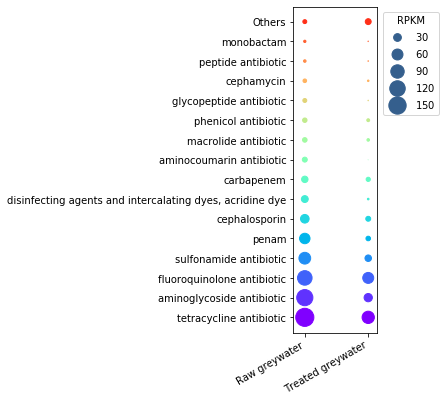

In [397]:
NUM_COLORS = 16
cm = pylab.get_cmap('rainbow')
colors = []
for i in range(NUM_COLORS):
    colors.append(cm(1.*i/NUM_COLORS))
colors = colors*2
plt.rcParams['figure.figsize'] = [1.5, 6] #(width, height)

fig, ax = plt.subplots()
scatter = ax.scatter(x="Treatment", y="Drug Class", s="size", c=colors, data=DrugClass_unstack)

#plt.scatter(x="Treatment", y="Drug Class", s="size", c=colors, data=DrugClass_unstack)
plt.xticks(rotation=30, horizontalalignment="right")
kw = dict(prop="sizes", num=5, color=scatter.cmap(0.3),
          func=lambda s: s/2)
ax.legend(*scatter.legend_elements(**kw), loc="upper right", title="RPKM", bbox_to_anchor=(1.8, 1))
#plt.legend(bbox_to_anchor=(2.2, 1))
plt.savefig('ARGs/figures/RGI-bwt_DrugClass_rpkm_strict.pdf', bbox_inches='tight')